In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
import random

In [2]:
xs = np.array([1,2,3,4,5,6],dtype = np.float64)
ys = np.array([5,4,6,5,6,7],dtype = np.float64)

def best_fit_slope(xs,ys):
    m = ((mean(xs) * mean(ys) - mean(xs * ys)) / ((mean(xs)) ** 2 - mean(xs ** 2)))
    b = mean(ys) - m * mean(xs)
    return m,b
m,b = best_fit_slope(xs,ys)
print(m,b)

0.42857142857142866 4.0


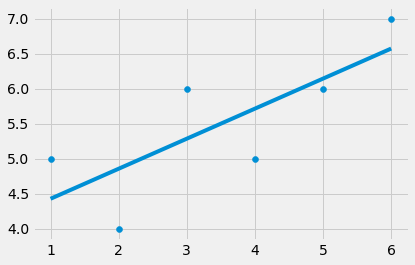

In [3]:
regression_line = [(m*x) + b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs,regression_line)

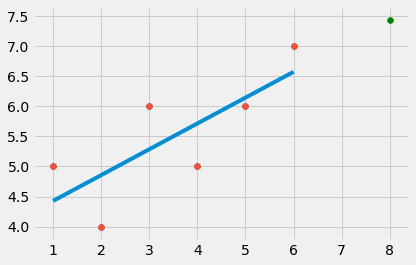

In [4]:
regression_line = [(m*x) + b for x in xs]
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x ,predict_y, color='g')
plt.scatter(xs,ys)

plt.plot(xs,regression_line)

In [5]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig)**2)
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regression = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig,y_mean_line)
    return 1 - (squared_error_regression/squared_error_y_mean)
r_squared = coefficient_of_determination(ys,regression_line)
r_squared

0.5844155844155845

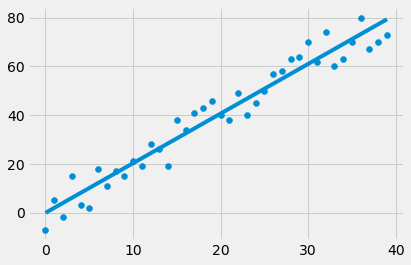

In [6]:
# Testing assumptions
def create_dataset(hm, variance,step = 2, correlation = False):
    """create a dataset"""
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)
xs,ys = create_dataset(40, 10, 2, correlation = 'pos')
m,b = best_fit_slope(xs,ys)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
r_squared

plt.scatter(xs,ys)
plt.plot(xs, regression_line)

In [7]:
r_squared

0.9452780680247233